**Problem:2**

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Logistic Regression, LDA and CART

Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("Contraceptive_method_dataset.xlsx")

In [3]:
df

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes


In [4]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [5]:
df.shape

(1473, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


many columns are of type object i.e. strings. These need to be converted to ordinal type

In [8]:
df.duplicated().sum()

80

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(1393, 10)

In [11]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [12]:
print('Wife_education\n',df['Wife_ education'].value_counts())
print('\n')
print('Husband_education \n',df.Husband_education.value_counts())
print('\n')
print('Wife_religion \n',df.Wife_religion.value_counts())
print('\n')
print('Wife_working \n',df.Wife_Working.value_counts())
print('\n')
print('Standard_of_living_index \n',df.Standard_of_living_index.value_counts())
print('\n')
print('Media_exposure \n',df['Media_exposure '].value_counts())
print('\n')
print('Contraceptive_method_used \n',df.Contraceptive_method_used.value_counts())

Wife_education
 Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education 
 Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion 
 Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_working 
 No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index 
 Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
 Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used 
 Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64


In [13]:
#['Primary', 'Uneducated', 'Secondary', 'Tertiary']
df['Wife_ education']=np.where(df['Wife_ education'] =='Uneducated', 1, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Primary', 2, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Secondary', 3, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Tertiary', 4, df['Wife_ education'])

#['Secondary', 'Primary', 'Tertiary', 'Uneducated']
df['Husband_education']=np.where(df['Husband_education'] =='Uneducated', 1, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Primary', 2, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Secondary', 3, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Tertiary', 4, df['Husband_education'])

#['Scientology', 'Non-Scientology']
df['Wife_religion']=np.where(df['Wife_religion'] =='Non-Scientology', 0, df['Wife_religion'])
df['Wife_religion']=np.where(df['Wife_religion'] =='Scientology', 1, df['Wife_religion'])

#['No', 'Yes']
df['Wife_Working']=np.where(df['Wife_Working'] =='No', 0, df['Wife_Working'])
df['Wife_Working']=np.where(df['Wife_Working'] =='Yes', 1, df['Wife_Working'])

#['High', 'Very High', 'Low', 'Very Low']
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very Low', 1, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Low', 2, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='High', 3, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very High', 4, df['Standard_of_living_index'])

#['Exposed', 'Not-Exposed']
df['Media_exposure ']=np.where(df['Media_exposure '] =='Not-Exposed', 0, df['Media_exposure '])
df['Media_exposure ']=np.where(df['Media_exposure '] =='Exposed', 1, df['Media_exposure '])

#['No', 'Yes']
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used'] =='No', 0, df['Contraceptive_method_used'])
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used'] =='Yes', 1, df['Contraceptive_method_used'])


/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_3351/1134855473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wife_ education']=np.where(df['Wife_ education'] =='Uneducated', 1, df['Wife_ education'])
/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_3351/1134855473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wife_ education']=np.where(df['Wife_ education'] =='Primary', 2, df['Wife_ education'])
/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_3351/1134855

In [14]:
df['Wife_ education'] = df['Wife_ education'].astype(int)
df['Husband_education'] = df['Husband_education'].astype(int)
df['Wife_religion'] = df['Wife_religion'].astype(int)
df['Wife_Working'] = df['Wife_Working'].astype(int)
df['Standard_of_living_index'] = df['Standard_of_living_index'].astype(int)
df['Media_exposure '] = df['Media_exposure '].astype(int)
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].astype(int)

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_3351/1122429472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wife_ education'] = df['Wife_ education'].astype(int)
/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_3351/1122429472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Husband_education'] = df['Husband_education'].astype(int)
/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_3351/1122429472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


In [16]:
df

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,0
1,45.0,1,3,10.0,1,0,3,4,1,0
2,43.0,2,3,7.0,1,0,3,4,1,0
3,42.0,3,2,9.0,1,0,3,3,1,0
4,36.0,3,3,8.0,1,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,4,4,NaN,1,1,2,4,1,1
1469,33.0,4,4,NaN,1,0,1,4,1,1
1470,39.0,3,3,NaN,1,1,1,4,1,1
1471,33.0,3,3,NaN,1,1,2,2,1,1


In [17]:
print('Wife_education\n',df['Wife_ education'].value_counts())
print('\n')
print('Husband_education \n',df.Husband_education.value_counts())
print('\n')
print('Wife_religion \n',df.Wife_religion.value_counts())
print('\n')
print('Wife_working \n',df.Wife_Working.value_counts())
print('\n')
print('Standard_of_living_index \n',df.Standard_of_living_index.value_counts())
print('\n')
print('Media_exposure \n',df['Media_exposure '].value_counts())
print('\n')
print('Contraceptive_method_used \n',df.Contraceptive_method_used.value_counts())

Wife_education
 4    515
3    398
2    330
1    150
Name: Wife_ education, dtype: int64


Husband_education 
 4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64


Wife_religion 
 1    1186
0     207
Name: Wife_religion, dtype: int64


Wife_working 
 0    1043
1     350
Name: Wife_Working, dtype: int64


Standard_of_living_index 
 4    618
3    419
2    227
1    129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
 1    1284
0     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used 
 1    779
0    614
Name: Contraceptive_method_used, dtype: int64


Label Encoding has been done and all columns are converted to number

In [18]:
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

Let's do data processing

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1326.0,32.557315,8.289259,16.0,26.0,32.0,39.0,49.0
Wife_ education,1393.0,2.917444,1.015507,1.0,2.0,3.0,4.0,4.0
Husband_education,1393.0,3.404882,0.825965,1.0,3.0,4.0,4.0,4.0
No_of_children_born,1372.0,3.290816,2.399697,0.0,1.0,3.0,5.0,16.0
Wife_religion,1393.0,0.851400,0.355822,0.0,1.0,1.0,1.0,1.0
Wife_Working,1393.0,0.251256,0.433891,0.0,0.0,0.0,1.0,1.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1393.0,3.095477,0.984179,1.0,2.0,3.0,4.0,4.0
Media_exposure,1393.0,0.921752,0.268658,0.0,1.0,1.0,1.0,1.0
Contraceptive_method_used,1393.0,0.559225,0.496658,0.0,0.0,1.0,1.0,1.0


In [20]:
import matplotlib.pyplot as plt   
import seaborn as sns

<Axes: xlabel='Wife_age'>

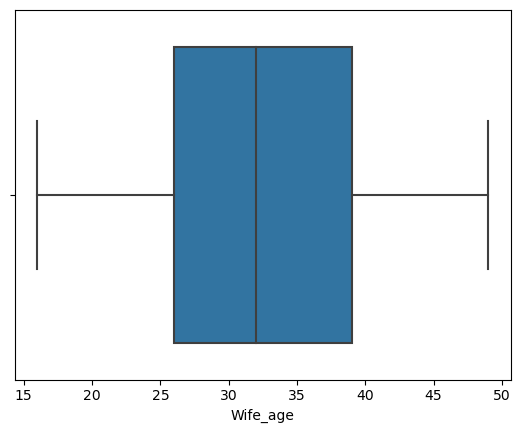

In [21]:
sns.boxplot(data=df, x='Wife_age')

<Axes: xlabel='No_of_children_born'>

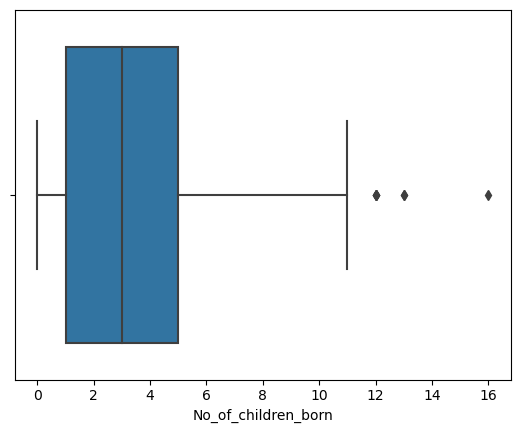

In [22]:
sns.boxplot(data=df, x='No_of_children_born')

Replacing the null values of wife_age column and no_of_children_born with median.

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer=SimpleImputer(missing_values=np.nan,strategy= 'median')

In [25]:
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [26]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   float64
 2   Husband_education          1393 non-null   float64
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   float64
 5   Wife_Working               1393 non-null   float64
 6   Husband_Occupation         1393 non-null   float64
 7   Standard_of_living_index   1393 non-null   float64
 8   Media_exposure             1393 non-null   float64
 9   Contraceptive_method_used  1393 non-null   float64
dtypes: float64(10)
memory usage: 109.0 KB


In [28]:
print('Wife_education\n',df['Wife_ education'].value_counts())
print('\n')
print('Husband_education \n',df.Husband_education.value_counts())
print('\n')
print('Wife_religion \n',df.Wife_religion.value_counts())
print('\n')
print('Wife_working \n',df.Wife_Working.value_counts())
print('\n')
print('Standard_of_living_index \n',df.Standard_of_living_index.value_counts())
print('\n')
print('Media_exposure \n',df['Media_exposure '].value_counts())
print('\n')
print('Contraceptive_method_used \n',df.Contraceptive_method_used.value_counts())

Wife_education
 4.0    515
3.0    398
2.0    330
1.0    150
Name: Wife_ education, dtype: int64


Husband_education 
 4.0    827
3.0    347
2.0    175
1.0     44
Name: Husband_education, dtype: int64


Wife_religion 
 1.0    1186
0.0     207
Name: Wife_religion, dtype: int64


Wife_working 
 0.0    1043
1.0     350
Name: Wife_Working, dtype: int64


Standard_of_living_index 
 4.0    618
3.0    419
2.0    227
1.0    129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
 1.0    1284
0.0     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used 
 1.0    779
0.0    614
Name: Contraceptive_method_used, dtype: int64


Analysis

Univariate Analysis

<Axes: xlabel='Wife_age'>

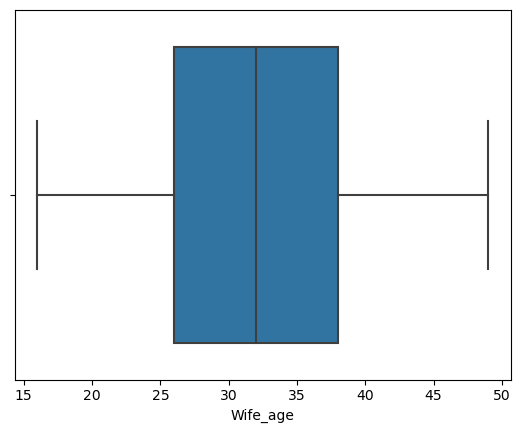

In [29]:
sns.boxplot(data=df, x='Wife_age')

<Axes: xlabel='Wife_ education', ylabel='count'>

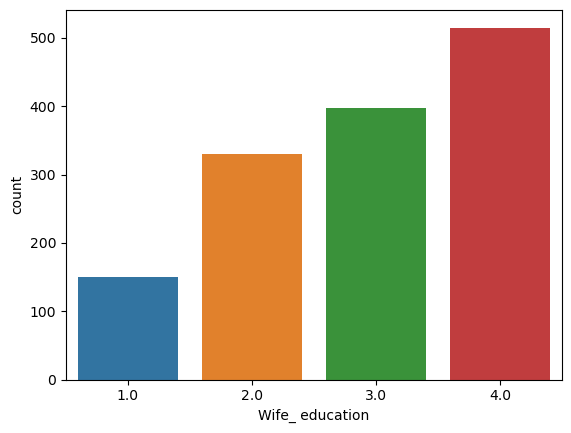

In [30]:
sns.countplot(data=df, x='Wife_ education')

<Axes: xlabel='Husband_education', ylabel='count'>

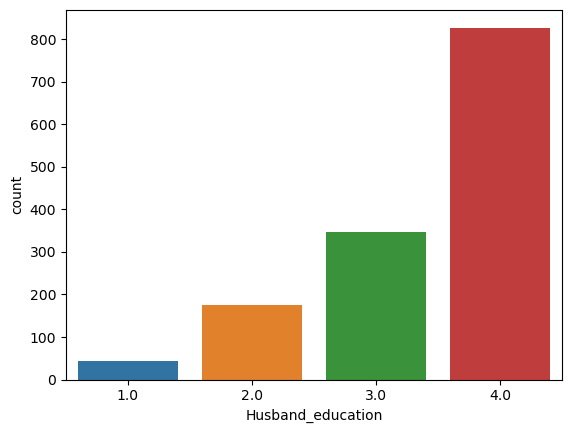

In [31]:
sns.countplot(data=df, x='Husband_education')

<Axes: xlabel='No_of_children_born', ylabel='count'>

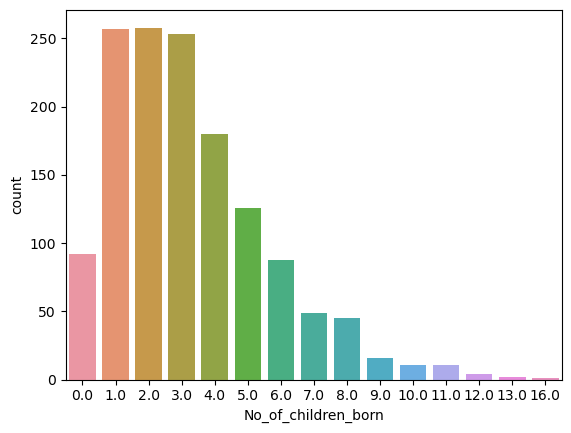

In [32]:
sns.countplot(data=df, x='No_of_children_born')

<Axes: xlabel='No_of_children_born'>

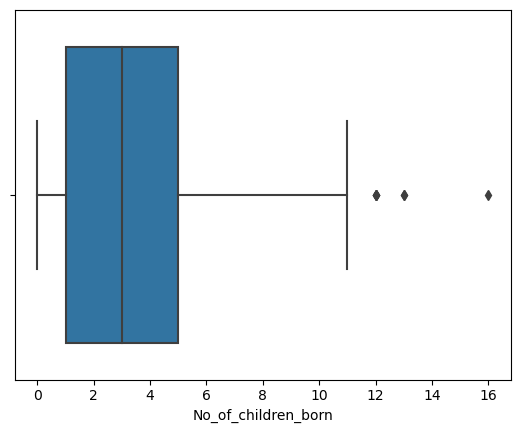

In [33]:
sns.boxplot(data=df, x='No_of_children_born')

<Axes: xlabel='Wife_religion', ylabel='count'>

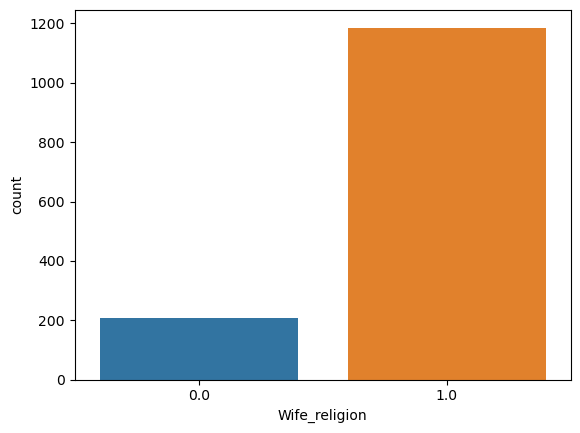

In [34]:
sns.countplot(data=df, x='Wife_religion')

<Axes: xlabel='Wife_Working', ylabel='count'>

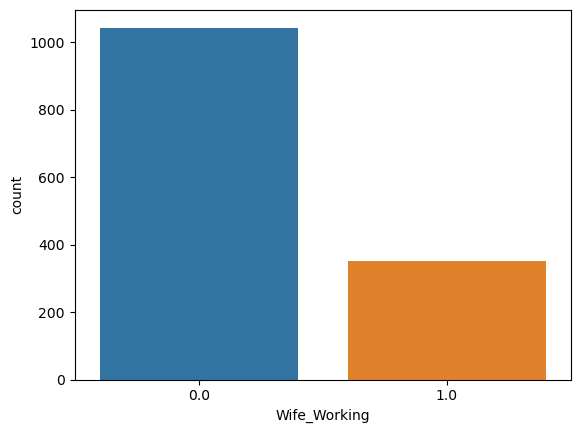

In [35]:
sns.countplot(data=df, x='Wife_Working')

<Axes: xlabel='Husband_Occupation', ylabel='count'>

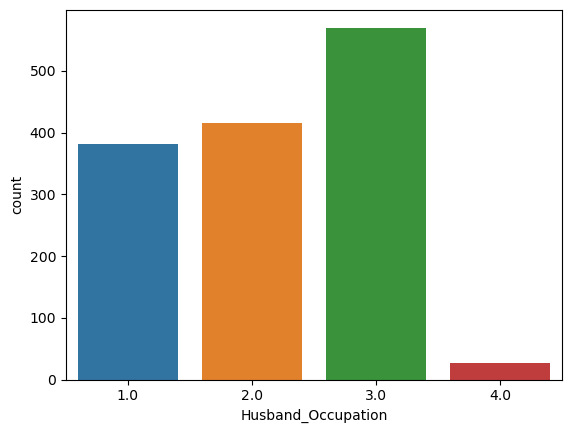

In [36]:
sns.countplot(data=df, x='Husband_Occupation')

<Axes: xlabel='Standard_of_living_index', ylabel='count'>

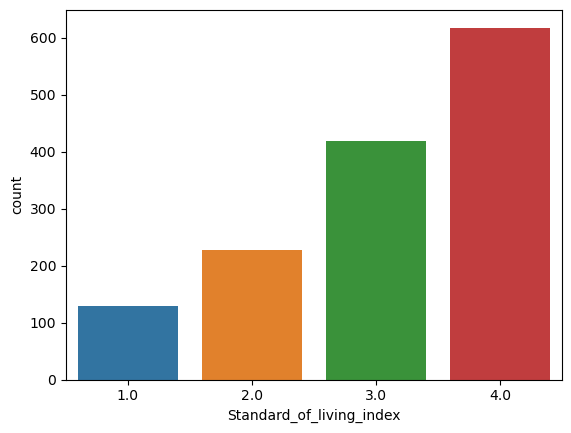

In [37]:
sns.countplot(data=df, x='Standard_of_living_index')

<Axes: xlabel='Media_exposure ', ylabel='count'>

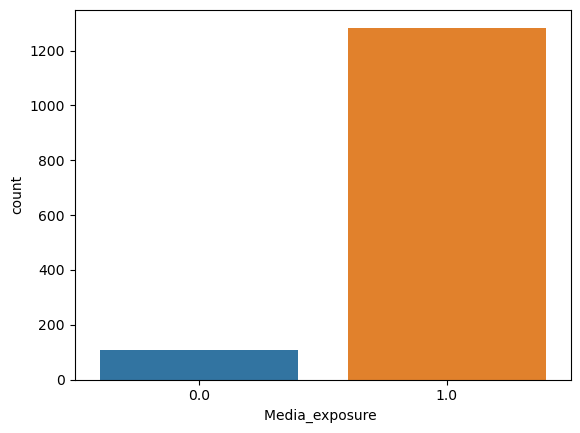

In [38]:
sns.countplot(data=df, x='Media_exposure ')

<Axes: xlabel='Contraceptive_method_used', ylabel='count'>

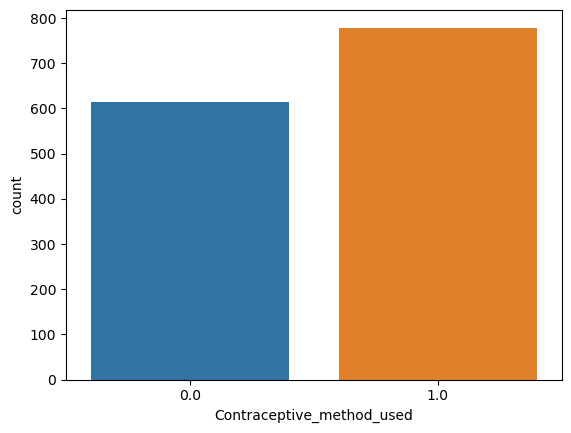

In [39]:
sns.countplot(data=df, x='Contraceptive_method_used')

Bivariate Analysis

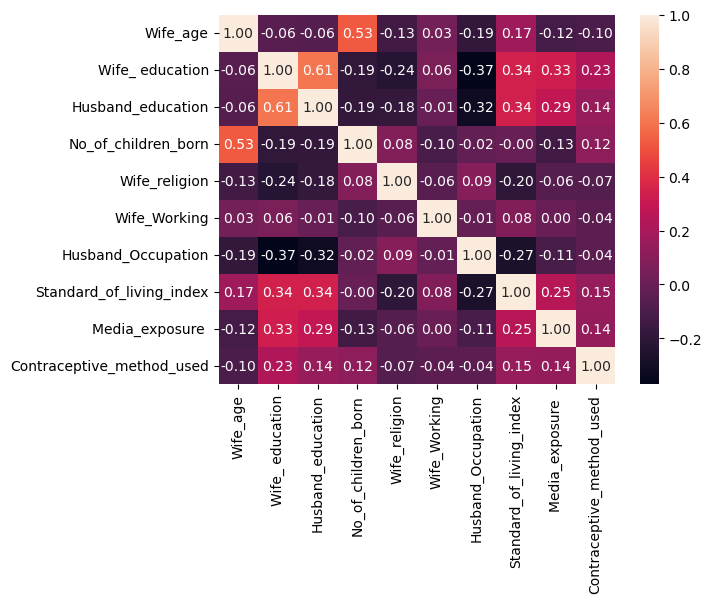

In [40]:
sns.heatmap(df.corr(),annot=True,fmt='.2f');

<Axes: xlabel='Contraceptive_method_used', ylabel='Wife_age'>

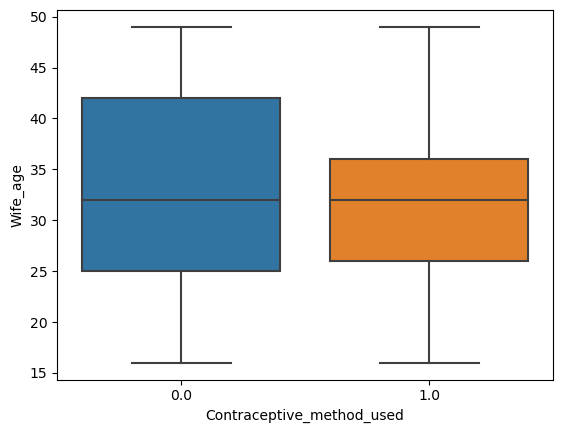

In [41]:
sns.boxplot(data=df, x='Contraceptive_method_used', y='Wife_age')

<Axes: xlabel='Contraceptive_method_used', ylabel='count'>

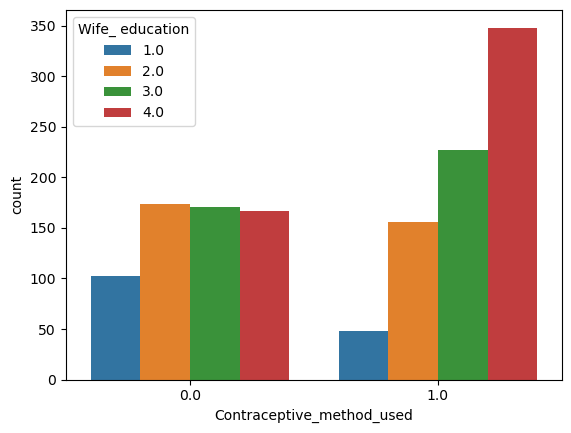

In [42]:
sns.countplot(data=df, x='Contraceptive_method_used', hue='Wife_ education')

<Axes: xlabel='Contraceptive_method_used', ylabel='count'>

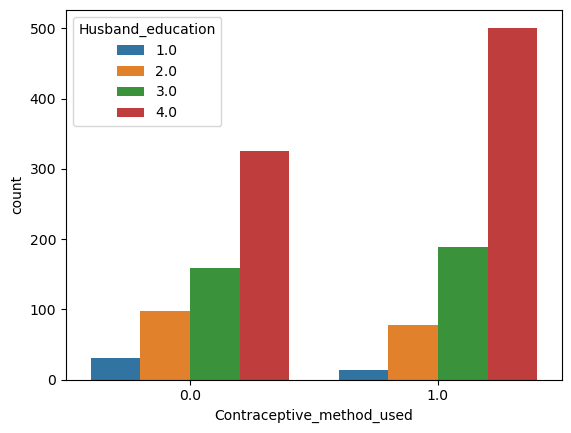

In [43]:
sns.countplot(data=df, x='Contraceptive_method_used', hue='Husband_education')

<Axes: xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

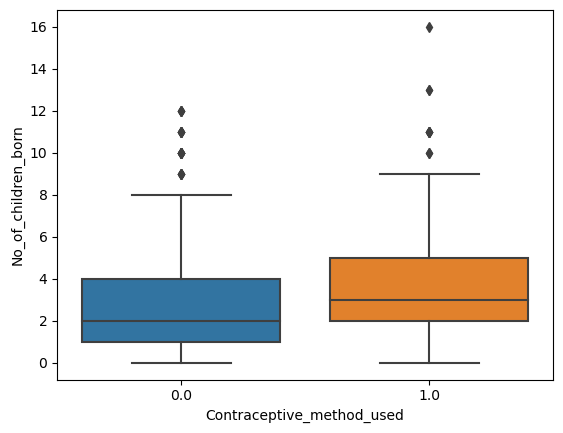

In [44]:
sns.boxplot(data=df, x='Contraceptive_method_used', y='No_of_children_born')

<Axes: xlabel='Contraceptive_method_used', ylabel='count'>

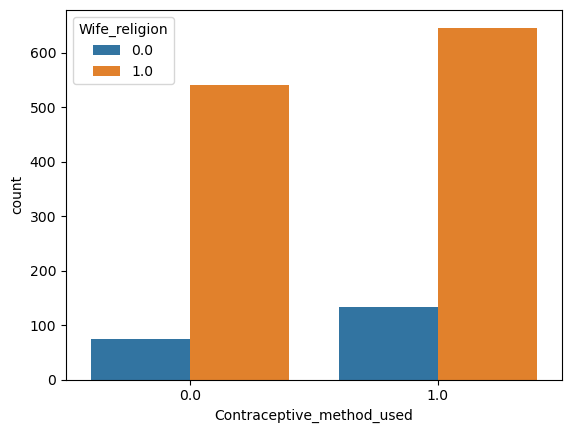

In [45]:
sns.countplot(data=df, x='Contraceptive_method_used', hue='Wife_religion')

<Axes: xlabel='Contraceptive_method_used', ylabel='count'>

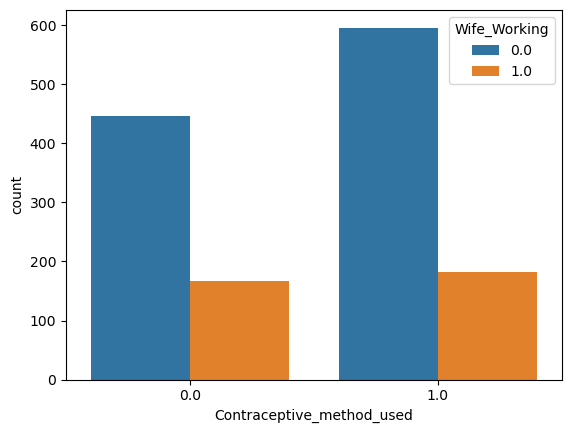

In [46]:
sns.countplot(data=df, x='Contraceptive_method_used', hue='Wife_Working')

<Axes: xlabel='Husband_Occupation', ylabel='count'>

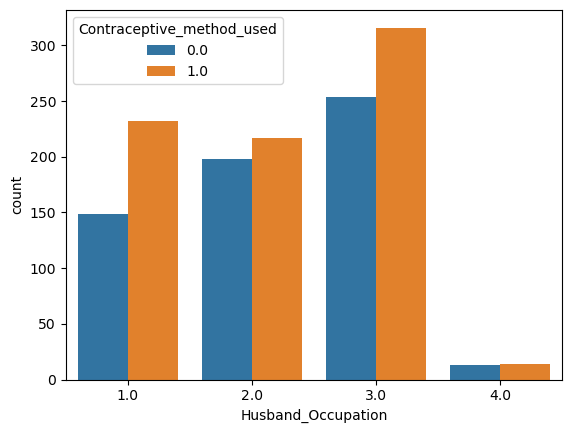

In [47]:
sns.countplot(data=df, hue='Contraceptive_method_used', x='Husband_Occupation')

<Axes: xlabel='Standard_of_living_index', ylabel='count'>

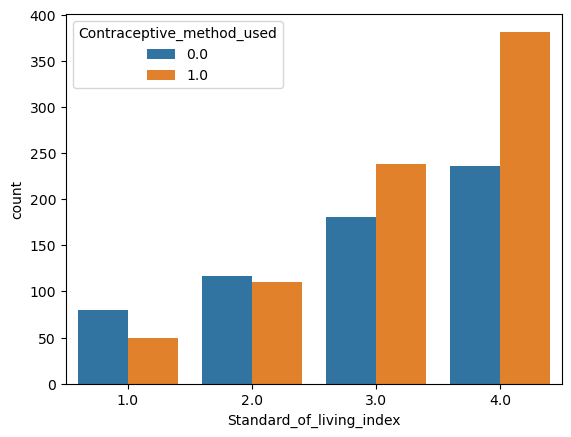

In [48]:
sns.countplot(data=df, hue='Contraceptive_method_used', x='Standard_of_living_index')

<Axes: xlabel='Media_exposure ', ylabel='count'>

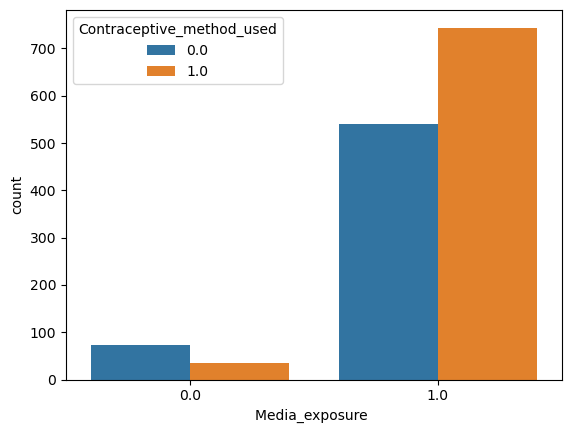

In [49]:
sns.countplot(data=df, x='Media_exposure ', hue='Contraceptive_method_used')

Multivariate Analysis

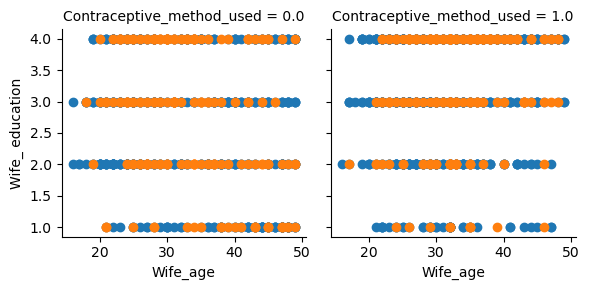

In [50]:
g=sns.FacetGrid(df, col='Contraceptive_method_used',hue='Wife_Working')
g=g.map(plt.scatter,'Wife_age','Wife_ education')

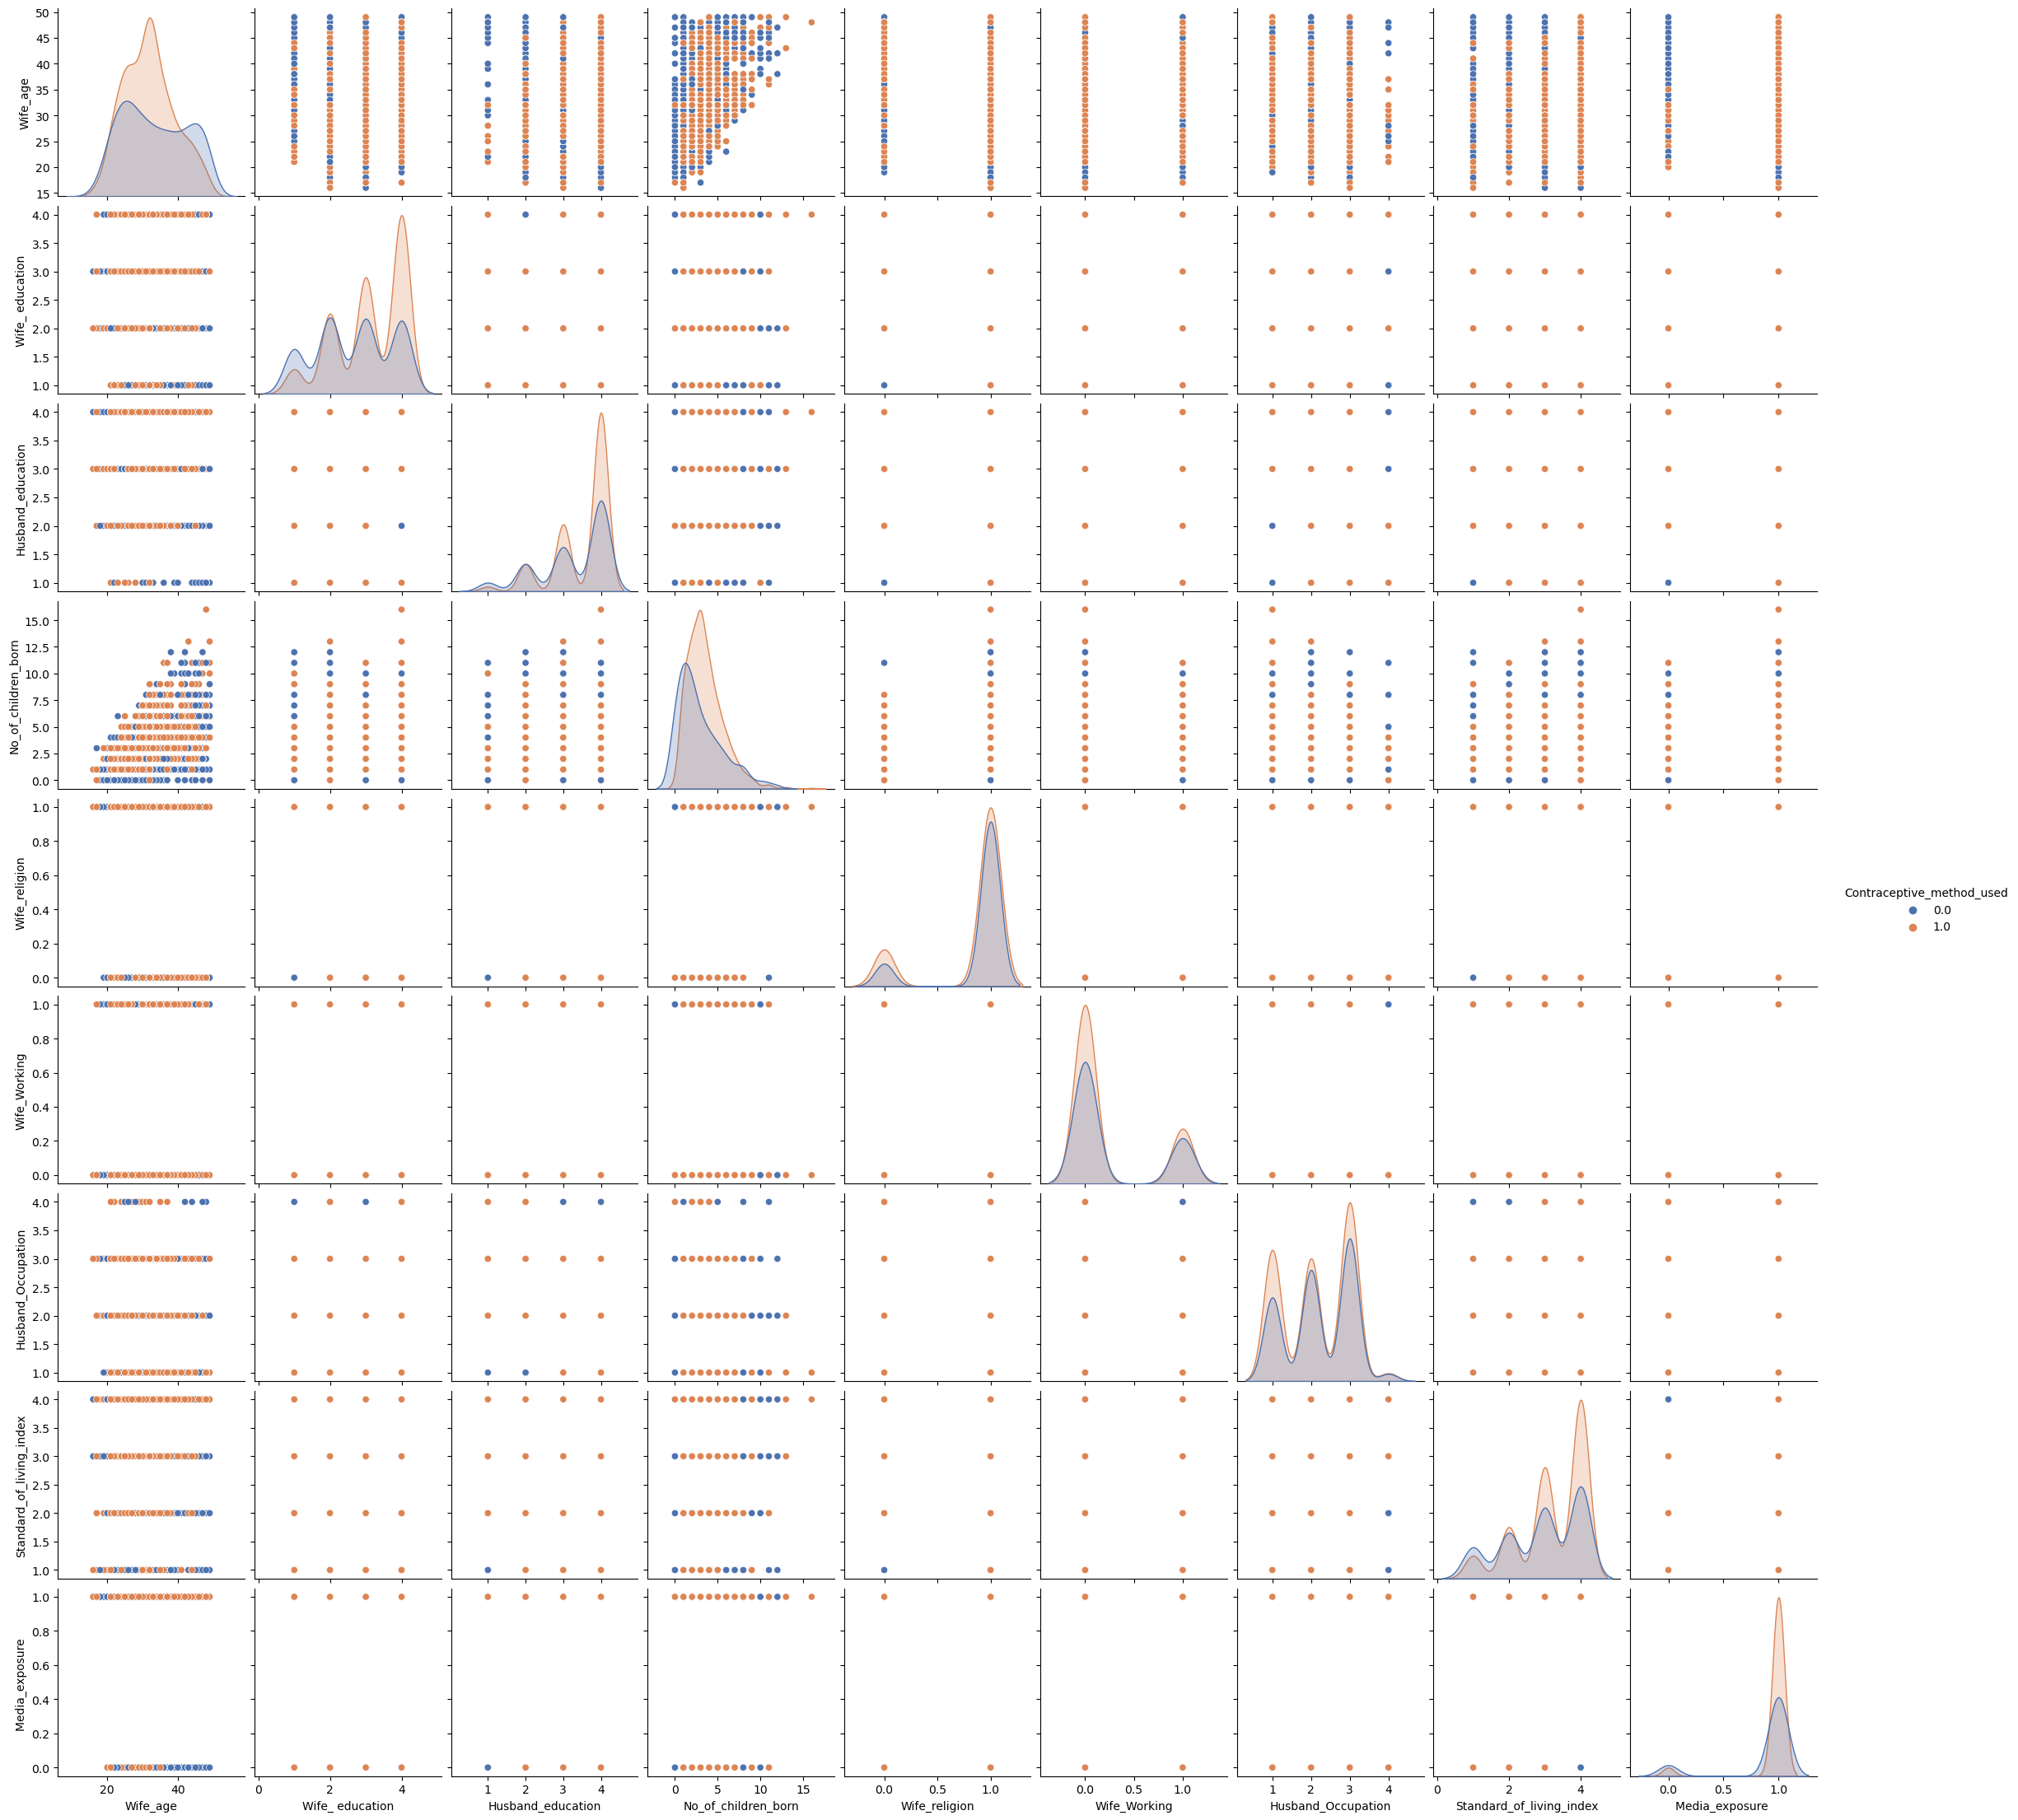

In [51]:
sns.pairplot(df, hue='Contraceptive_method_used',palette = 'deep')


Logistic Regression, LDA and CART

CART:

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# capture the target column ("Contraceptive_method_used") into separate vectors for training set and test set

X = df.drop("Contraceptive_method_used" , axis=1)

y = df.pop("Contraceptive_method_used")


In [54]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [55]:
model = DecisionTreeClassifier(criterion = 'gini' )

In [56]:
model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [57]:
from sklearn import tree

train_char_label = ['No', 'Yes']
df_Tree_File = open('df_tree.dot','w')
dot_data = tree.export_graphviz(model, out_file=df_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

df_Tree_File.close()


In [58]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                               Imp
Wife_age                  0.284674
Wife_ education           0.109656
Husband_education         0.049222
No_of_children_born       0.250483
Wife_religion             0.037642
Wife_Working              0.049698
Husband_Occupation        0.094572
Standard_of_living_index  0.101042
Media_exposure            0.023012


In [59]:
y_predict = model.predict(X_test)

**Regularising the Decision Tree**

In [60]:
reg_df_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_df_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [61]:
df_tree_regularized = open('df_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_df_model, out_file= df_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

df_tree_regularized.close()

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                               Imp
Wife_age                  0.284674
Wife_ education           0.109656
Husband_education         0.049222
No_of_children_born       0.250483
Wife_religion             0.037642
Wife_Working              0.049698
Husband_Occupation        0.094572
Standard_of_living_index  0.101042
Media_exposure            0.023012


In [62]:
ytrain_predict = reg_df_model.predict(X_train)
ytest_predict = reg_df_model.predict(X_test)

In [63]:
import matplotlib.pyplot as plt

AUC: 0.824


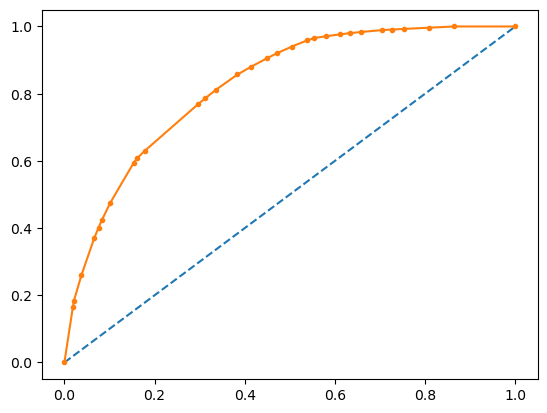

In [64]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_df_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.699


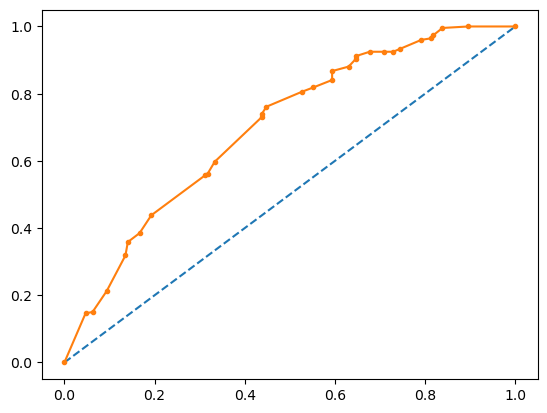

In [65]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_df_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.62      0.68       422
         1.0       0.75      0.86      0.80       553

    accuracy                           0.75       975
   macro avg       0.76      0.74      0.74       975
weighted avg       0.75      0.75      0.75       975



In [68]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.67      0.47      0.56       192
         1.0       0.64      0.81      0.72       226

    accuracy                           0.65       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.65      0.64       418



In [69]:
confusion_matrix(train_labels, ytrain_predict)

array([[260, 162],
       [ 79, 474]])

In [70]:
confusion_matrix(test_labels, ytest_predict)

array([[ 91, 101],
       [ 44, 182]])

In [71]:
reg_df_model.score(X_train,train_labels)

0.7528205128205128

In [72]:
reg_df_model.score(X_test,test_labels)

0.65311004784689

Logistic Regression:

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [74]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train,train_labels)

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [75]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [76]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.274250,0.725750
1,0.443132,0.556868
2,0.598170,0.401830
3,0.256419,0.743581
4,0.185156,0.814844


In [77]:
# Accuracy - Training Data
model.score(X_train, train_labels)

0.6953846153846154


- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**


AUC: 0.725


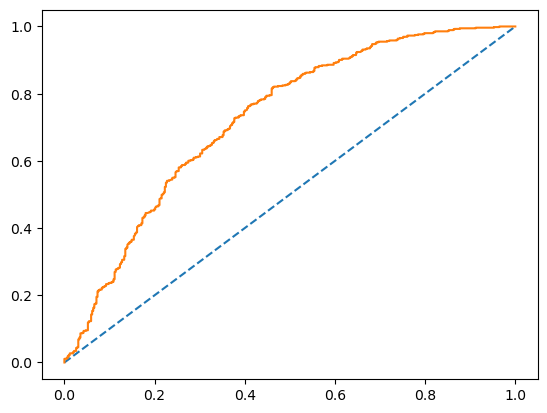

In [78]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [79]:
model.score(X_test, test_labels)

0.6172248803827751

AUC: 0.725


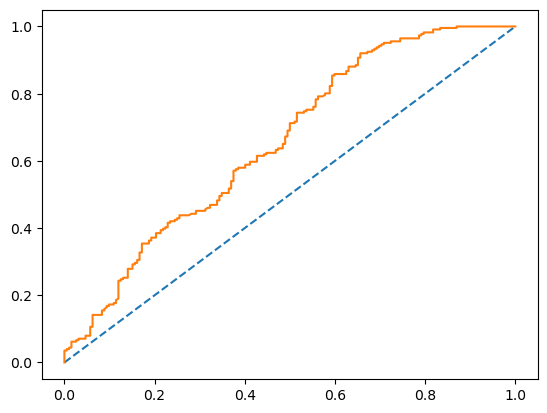

In [80]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [81]:
confusion_matrix(train_labels, ytrain_predict)

array([[228, 194],
       [103, 450]])

In [82]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.69      0.54      0.61       422
         1.0       0.70      0.81      0.75       553

    accuracy                           0.70       975
   macro avg       0.69      0.68      0.68       975
weighted avg       0.69      0.70      0.69       975



In [83]:
confusion_matrix(test_labels, ytest_predict)

array([[ 85, 107],
       [ 53, 173]])

In [84]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.62      0.44      0.52       192
         1.0       0.62      0.77      0.68       226

    accuracy                           0.62       418
   macro avg       0.62      0.60      0.60       418
weighted avg       0.62      0.62      0.61       418



In [85]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [86]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [87]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [88]:
grid_search.fit(X_train, train_labels)

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pavithra/

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [89]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [90]:
best_model = grid_search.best_estimator_

In [91]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [92]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.273196,0.726804
1,0.444427,0.555573
2,0.594547,0.405453
3,0.259172,0.740828
4,0.188279,0.811721


In [93]:
best_model.score(X_train, train_labels)

0.6923076923076923

In [94]:
best_model.score(X_test, test_labels)

0.6196172248803827

In [95]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()

In [96]:
tn,fp,fn,tp

(85, 107, 52, 174)

In [97]:
(tp+tn)/(tp+tn+fp+fn)# ACCURACY of predicting 0's and 1's correctly  

0.6196172248803827

In [98]:
tp/(tp+fn)#Recall for 1's

0.7699115044247787

                                                                                           Note :

                                                     Precison : tells us how many predictions are actually positive
                                                     
                                                                out of all the total positive predicted.
                                                     
                                                     Recall   : how many observations of positive class are actually 
                                                     
                                                                predicted as positive. 


**LDA:**

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [100]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,train_labels)

In [101]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

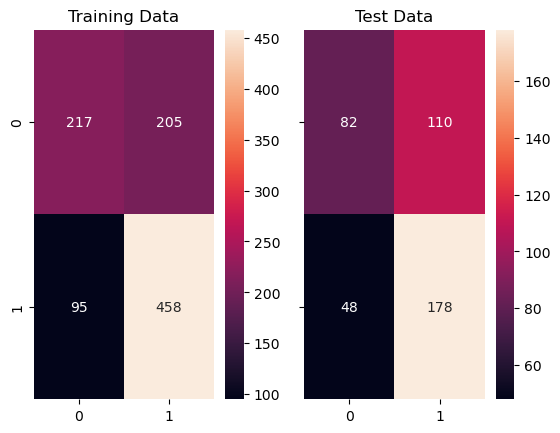

In [102]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(train_labels,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test_labels,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [103]:
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.70      0.51      0.59       422
         1.0       0.69      0.83      0.75       553

    accuracy                           0.69       975
   macro avg       0.69      0.67      0.67       975
weighted avg       0.69      0.69      0.68       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.63      0.43      0.51       192
         1.0       0.62      0.79      0.69       226

    accuracy                           0.62       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.62      0.62      0.61       418
 



In [104]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.724
AUC for the Test Data: 0.656


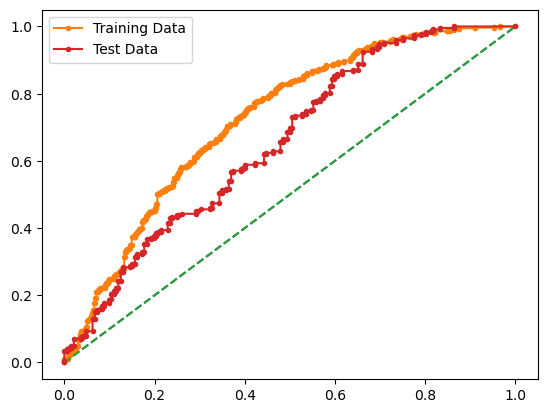

In [105]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [106]:
clf.intercept_ 

array([-0.90675224])

In [107]:
clf.coef_

array([[-0.08383057,  0.48973534,  0.07542596,  0.35443563, -0.42671887,
        -0.02218792,  0.17313293,  0.29931418,  0.1827471 ]])

In [108]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [109]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.08,  0.49,  0.08,  0.35, -0.43, -0.02,  0.17,  0.3 ,  0.18]])

#### By the above equation and the coefficients it is clear that 
- predictor 'Wife_education' has the largest magnitude thus this helps in classifying the best 
       
